<a href="https://colab.research.google.com/github/BhanuSrihridai/Chatbot-for-Postpartum-with-OpenAI-endpoint/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Glimpse of the data**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("customer churn.csv")
data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [3]:
data.sample(10).style.bar(cmap='hsv',height=65,width=70) # Adding internal bar charts to numerical columns for a sample of the data


,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
65636,65637,Customer_65637,31,Male,Los Angeles,17,81.080000,310,1
51296,51297,Customer_51297,55,Female,Miami,12,90.510000,327,0
73086,73087,Customer_73087,28,Female,Houston,1,40.390000,135,1
23028,23029,Customer_23029,24,Male,New York,4,60.800000,262,1
46614,46615,Customer_46615,37,Female,Los Angeles,16,43.560000,303,1
23723,23724,Customer_23724,54,Male,Miami,14,85.550000,391,0
42076,42077,Customer_42077,50,Female,Los Angeles,12,42.190000,456,0
12199,12200,Customer_12200,61,Female,Chicago,24,71.960000,427,0
20892,20893,Customer_20893,57,Female,Houston,18,95.010000,405,0
64307,64308,Customer_64308,27,Female,Miami,5,59.260000,438,1


In [4]:
data.shape


(100000, 9)

In [5]:
data.describe()


,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


There aren't missing values.

In [7]:
data.dtypes


CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [8]:
cat_cols=data.select_dtypes(include='object').columns
cat_cols

Index(['Name', 'Gender', 'Location'], dtype='object')

In [9]:
for column in cat_cols[1:]:
  unique_types=data[column].value_counts()
  print("\nIndividual Counts of ",column,":\n",unique_types)


Individual Counts of  Gender :
 Female    50216
Male      49784
Name: Gender, dtype: int64

Individual Counts of  Location :
 Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64


In [10]:
data.duplicated().sum()


0

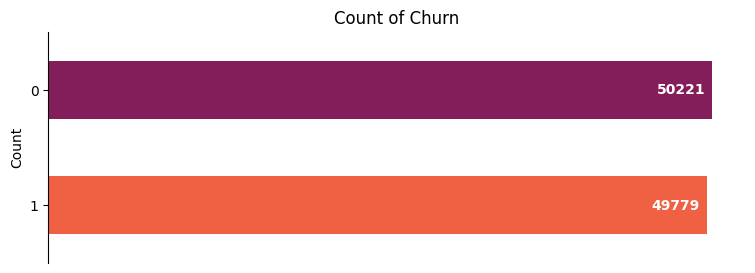

In [11]:
plt.figure(figsize=(9,3))

axes=sns.countplot(data=data,y='Churn',width=0.5,saturation=1,palette='rocket')
plt.title('Count of Churn')
plt.ylabel('Count')

axes.bar_label(axes.containers[0],color='white',padding=-40,fontweight='bold')                    # Setting the barlables, so that the count can be seen on the bars
axes.spines[['right','top','bottom']].set_visible(False)                                          # Removing the chart junk like boarders
axes.xaxis.set_visible(False)

Data is balanced. No need to implement data balancing techniques.

# **Data Cleaning & EDA**

As the values of columns 'Name' and 'Customer ID' are unique, we can drop them.

In [12]:
data=data.drop(['CustomerID','Name'],axis=1)


In [13]:
data.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


### **1. Age column**

In [14]:
data['Age'].isnull().sum()


0

<Axes: xlabel='Age'>

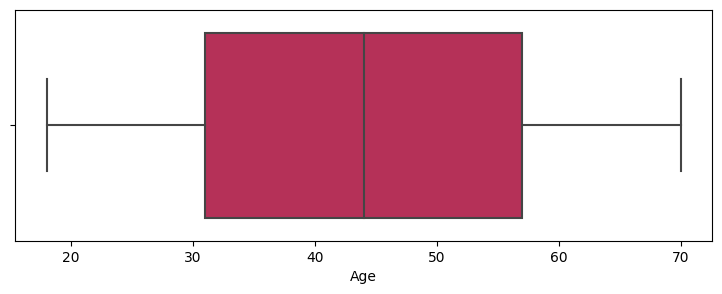

In [15]:
plt.figure(figsize=(9,3))
sns.boxplot(data=data,x='Age',palette='rocket')

There are no outliers.

Text(0.5, 1.0, 'Histogram of Probability of Churn in Age')

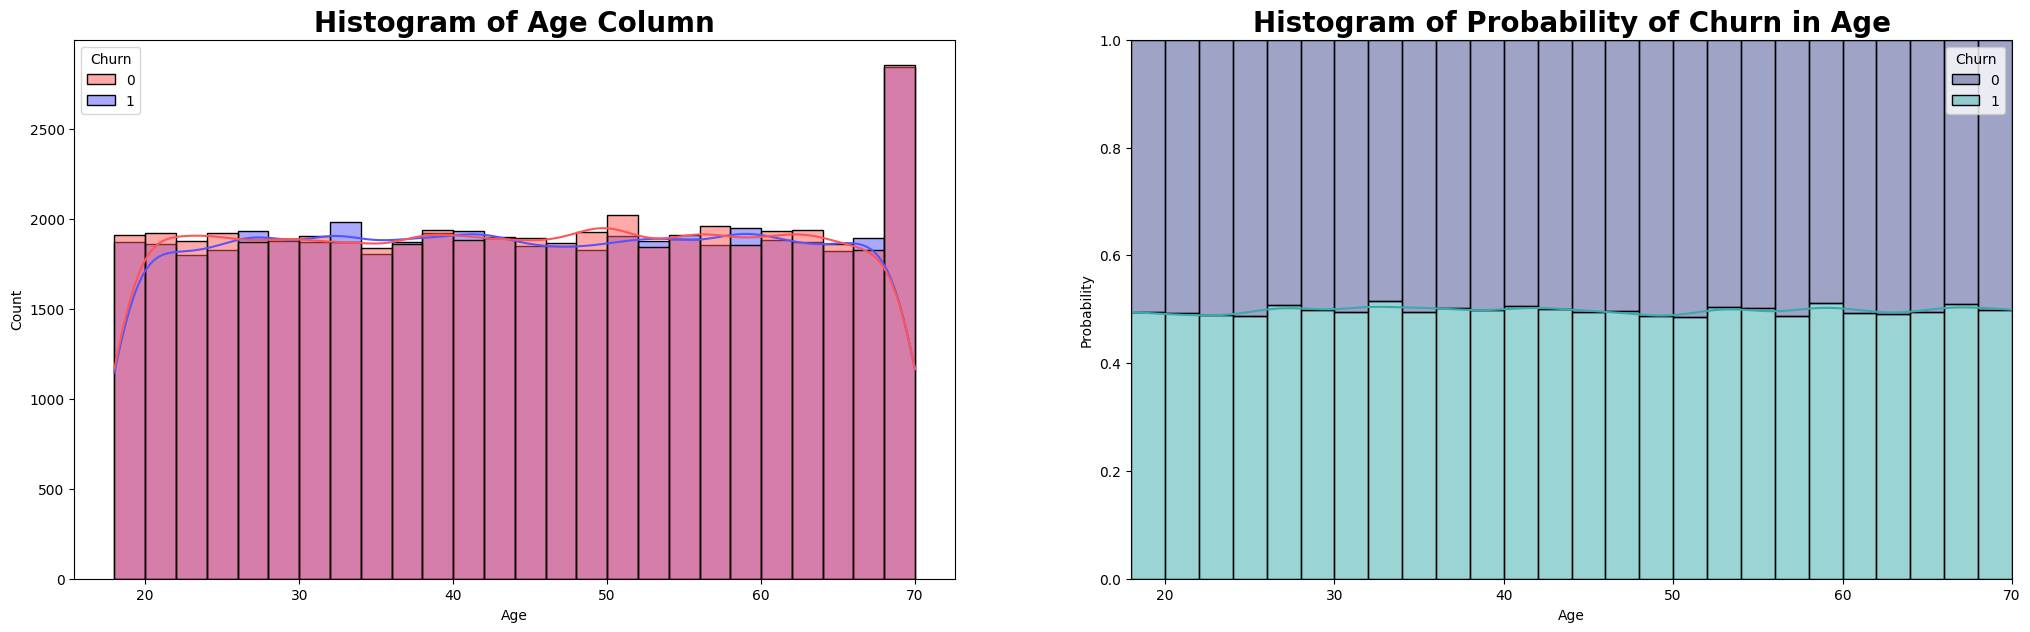

In [16]:
fig,axes=plt.subplots(1,2,figsize=(25,7))

sns.histplot(data=data,x=data['Age'],hue='Churn',palette='seismic_r',binwidth=2,kde=True,ax=axes[0]).set_title("Histogram of Age Column",fontweight='bold',fontsize=20)
sns.histplot(data=data,x=data['Age'],hue='Churn',palette='mako',binwidth=2,kde=True,ax=axes[1],multiple='fill',stat='probability').set_title("Histogram of Probability of Churn in Age",fontweight='bold',fontsize=20 )

The probability of churn is almost same among all age groups.

<Axes: xlabel='Age', ylabel='Subscription_Length_Months'>

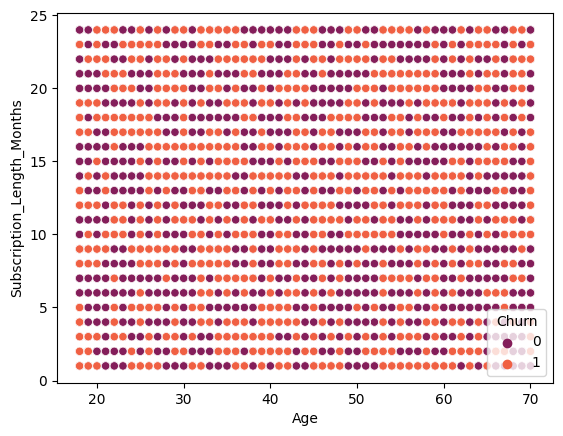

In [17]:
sns.scatterplot(data=data,x='Age',y='Subscription_Length_Months',palette='rocket',hue='Churn')

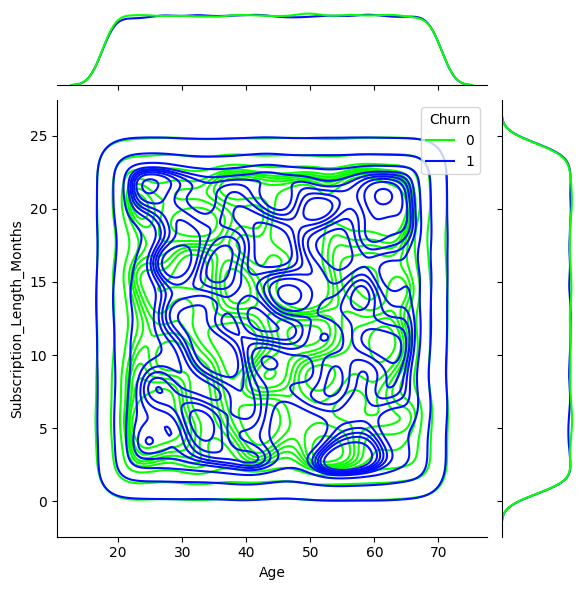

In [56]:
sns.jointplot(data=data,x='Age',y='Subscription_Length_Months',palette='hsv',hue='Churn',kind='kde')


In [18]:
data_group=data.groupby('Age').mean()
data_group

<ipython-input-18-6a84120c61e4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_group=data.groupby('Age').mean()


,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
Age,,,,
18,12.564981,65.601762,276.410549,0.510604
19,12.426069,64.132705,271.636270,0.480680
20,12.457582,64.802063,274.128314,0.494698
21,12.363205,64.689215,267.773326,0.489721
22,12.579183,64.302311,274.567991,0.486849
23,12.491256,64.782777,274.014308,0.491786
24,12.296908,65.687271,275.493603,0.472814
25,12.346339,64.952822,274.185462,0.502405
26,12.668623,65.210672,274.592850,0.493063


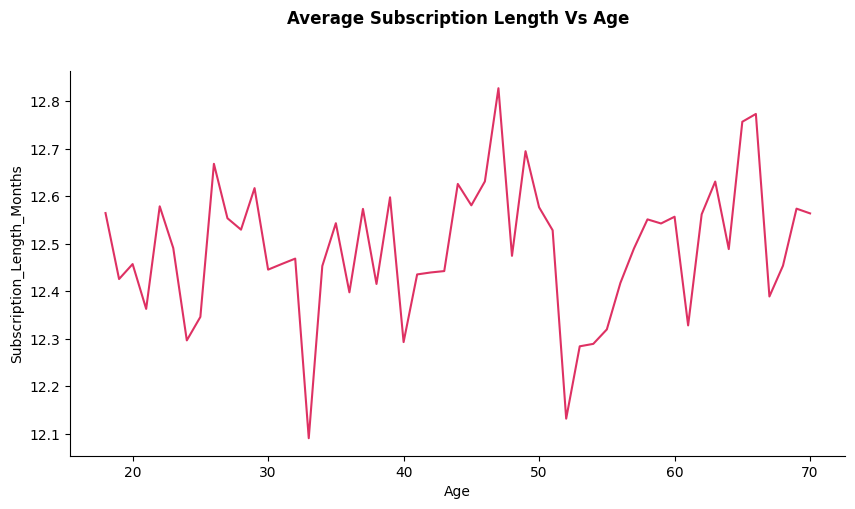

In [19]:
plt.figure(figsize=(10,5))
plt.title("Average Subscription Length Vs Age",y=1.1,fontweight='bold')

fig=sns.lineplot(data=data_group,y=data_group["Subscription_Length_Months"],x=data_group.index,color='#DE3163')
fig.spines[['right','top']].set_visible(False)                                          # Removing the chart junk like boarders

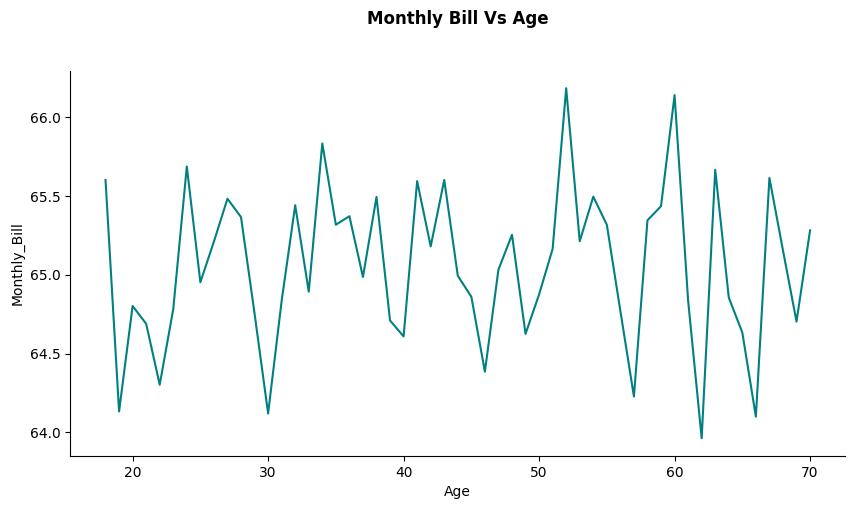

In [20]:
plt.figure(figsize=(10,5))
plt.title("Monthly Bill Vs Age",y=1.1,fontweight='bold')

fig=sns.lineplot(data=data_group,y=data_group['Monthly_Bill'],x=data_group.index,color='Teal')
fig.spines[['right','top']].set_visible(False)                                          # Removing the chart junk like boarders


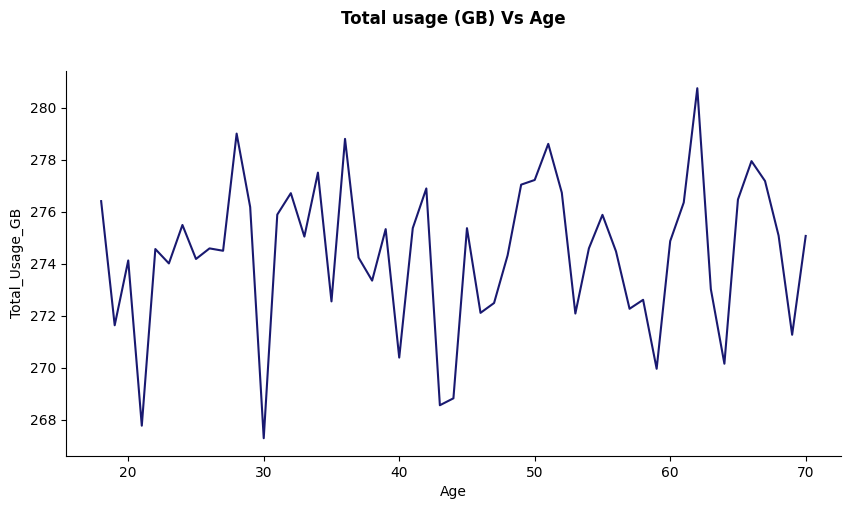

In [21]:
plt.figure(figsize=(10,5))
plt.title("Total usage (GB) Vs Age",y=1.1,fontweight='bold')

fig=sns.lineplot(data=data_group,y=data_group['Total_Usage_GB'],x=data_group.index,color='#191970')
fig.spines[['right','top']].set_visible(False)                                          # Removing the chart junk like boarders


In [22]:
data_manipulated=data.pivot_table(index=['Age','Location'],values=['Subscription_Length_Months','Monthly_Bill','Total_Usage_GB'],aggfunc=['mean','sum','max','min'])
data_manipulated

mean                                            \
                Monthly_Bill Subscription_Length_Months Total_Usage_GB   
Age Location                                                             
18  Chicago        66.528057                  12.772021     281.619171   
    Houston        64.665459                  12.832021     283.112861   
    Los Angeles    65.391734                  12.607046     276.742547   
    Miami          66.085153                  13.003067     275.604294   
    New York       65.387162                  11.663130     264.676393   
...                      ...                        ...            ...   
70  Chicago        65.728289                  12.687042     265.855746   
    Houston        63.827584                  12.329870     268.093506   
    Los Angeles    66.659739                  12.577023     272.817232   
    Miami          62.799431                  13.300813     285.661247   
    New York       67.325227                  11.933333     284.170667   

                         sum                                            \
                Monthly_Bill Subscription_Length_Months Total_Usage_GB   
Age Location                                                             
18  Chicago         25679.83                       4930         108705   
    Houston         24637.54                       4889         107866   
    Los Angeles     24129.55                       4652         102118   
    Miami           21543.76                       4239          89847   
    New York        24650.96                       4397          99783   
...                      ...                        ...            ...   
70  Chicago         26882.87                       5189         108735   
    Houston         24573.62                       4747         103216   
    Los Angeles     25530.68                       4817         104489   
    Miami           23172.99                       4908         105409   
    New York        25246.96                       4475         106564   

                         max                                            \
                Monthly_Bill Subscription_Length_Months Total_Usage_GB   
Age Location                                                             
18  Chicago            99.98                         24            500   
    Houston            99.71                         24            498   
    Los Angeles        99.90                         24            500   
    Miami              99.92                         24            499   
    New York           99.92                         24            499   
...                      ...                        ...            ...   
70  Chicago            99.74                         24            500   
    Houston            99.89                         24            499   
    Los Angeles        99.93                         24            498   
    Miami              99.96                         24            500   
    New York           99.92                         24            499   

                         min                                            
                Monthly_Bill Subscription_Length_Months Total_Usage_GB  
Age Location                                                            
18  Chicago            30.53                          1             50  
    Houston            30.02                          1             50  
    Los Angeles        30.01                          1             50  
    Miami              30.47                          1             52  
    New York           30.19                          1             50  
...                      ...                        ...            ...  
70  Chicago            30.10                          1             50  
    Houston            30.05                          1             52  
    Los Angeles        30.04                          1             50  
    Miami              30.20         

In [23]:
data_group_age2=data.groupby(['Age','Gender','Location']).mean()
data_group_age2.drop(['Churn'],axis=1,inplace=True)

In [24]:
data_group_age2_reset=data_group_age2.reset_index()
data_group_age2

Subscription_Length_Months  Monthly_Bill  \
Age Gender Location                                                
18  Female Chicago                       13.156250     67.983177   
           Houston                       12.884615     66.542637   
           Los Angeles                   13.027027     65.804486   
           Miami                         13.450617     64.163333   
           New York                      11.583333     66.700000   
...                                            ...           ...   
70  Male   Chicago                       12.553299     65.271066   
           Houston                       12.711443     65.293582   
           Los Angeles                   12.527094     65.109015   
           Miami                         12.972376     60.826740   
           New York                      12.409091     67.066023   

                        Total_Usage_GB  
Age Gender Location                     
18  Female Chicago          284.328125  
           Houston          282.846154  
           Los Angeles      278.627027  
           Miami            278.438272  
           New York         265.171875  
...                                ...  
70  Male   Chicago          259.675127  
           Houston          264.796020  
           Los Angeles      279.842365  
           Miami            279.756906  
           New York         288.352273  

[530 rows x 3 columns]

<Axes: xlabel='Age', ylabel='Subscription_Length_Months'>

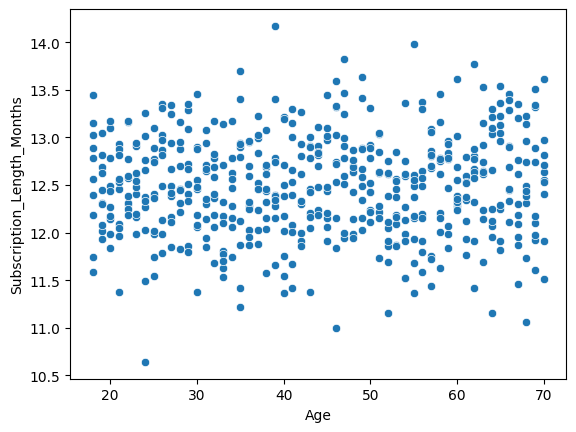

In [25]:
sns.scatterplot(data=data_group_age2,x='Age',y='Subscription_Length_Months')

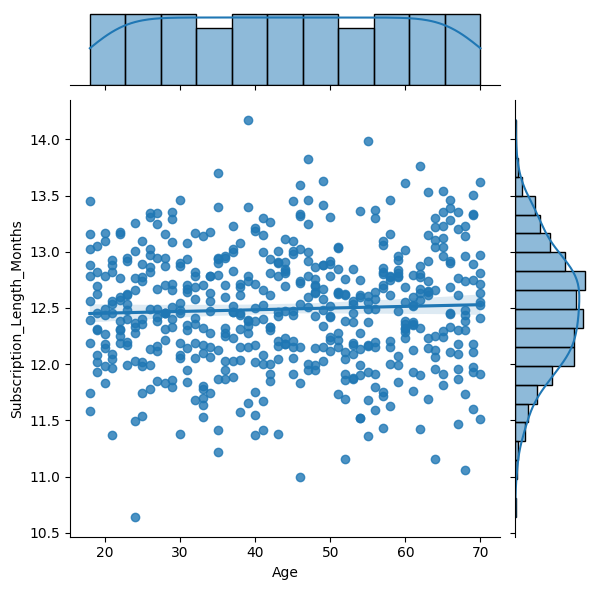

In [54]:
sns.jointplot(data=data_group_age2,x='Age',y='Subscription_Length_Months',palette='hsv',kind='reg')


<Axes: xlabel='Age', ylabel='Subscription_Length_Months'>

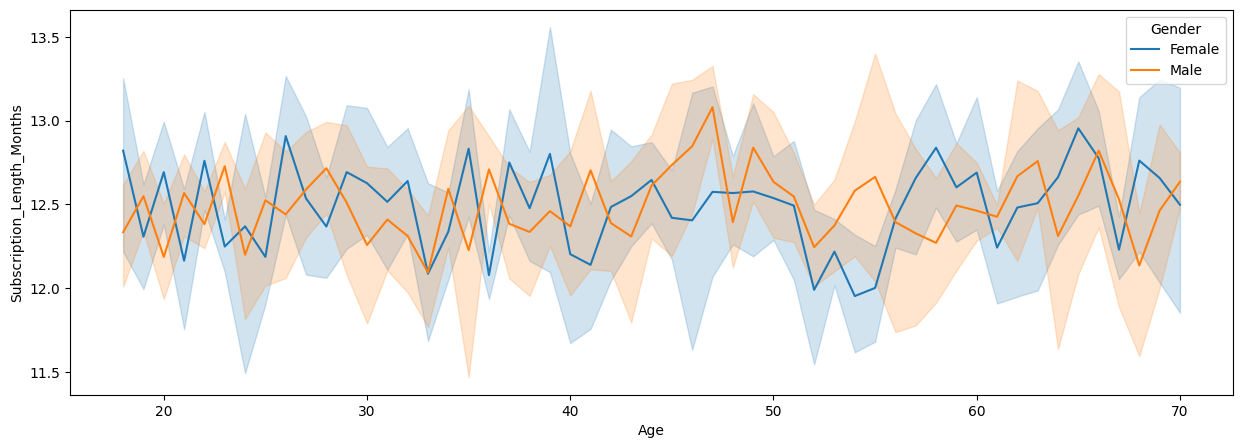

In [29]:
plt.figure(figsize=(15,5))
sns.lineplot(data=data_group_age2_reset,x='Age',y='Subscription_Length_Months',hue='Gender')

### 2. Gender Column



In [30]:
data['Gender'].value_counts()



Female    50216
Male      49784
Name: Gender, dtype: int64

**Univariation**

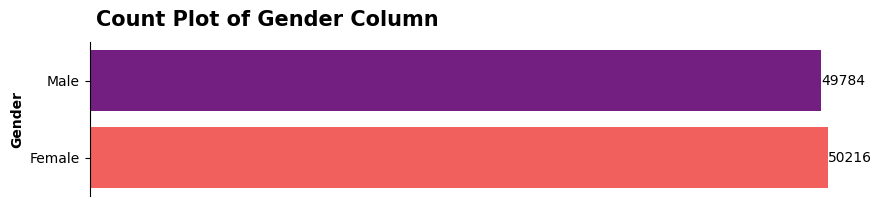

In [31]:
plt.figure(figsize=(10,2))
plot=sns.countplot(data=data,y='Gender',palette='magma',saturation=1)
title="Count Plot of Gender Column"
plot.set_title(f"{title}",fontsize=15,fontweight='bold',x=0.23,y=1.05)
plot.bar_label(plot.containers[0])
plot.spines[['right','top','bottom']].set_visible(False)                                # Removing the chart junk
plot.xaxis.set_visible(False)
plt.ylabel('Gender',fontweight='bold',fontsize=10)
plt.savefig(f'{title}')

Text(0.5, 0, 'Gender')

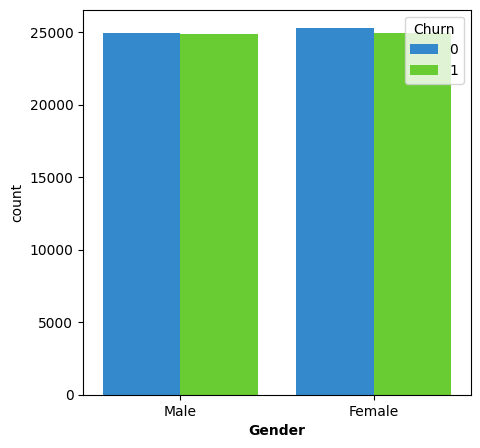

In [32]:
plt.figure(figsize=(5,5))
sns.countplot(data=data,x='Gender',hue='Churn',palette='gist_rainbow_r',saturation=0.6)
plt.xlabel('Gender',fontweight='bold')

**Bi-variation**

In [33]:
gender=pd.pivot_table(data=data,values='Churn',index='Gender').sort_values(by='Churn')
gender['Churn']=gender['Churn']*100
gender.style.bar(cmap='inferno',height=70,props="width:40em;")

,Churn
Gender,
Female,49.673411
Male,49.885505


In [34]:
gender.index

Index(['Female', 'Male'], dtype='object', name='Gender')

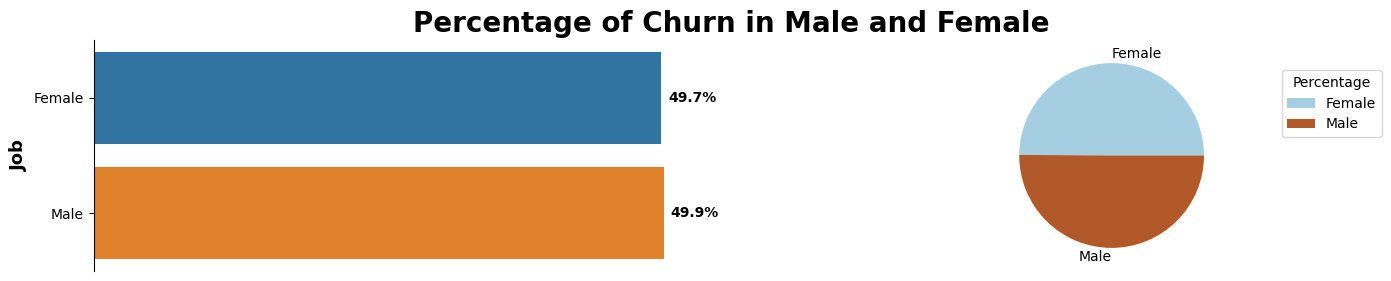

In [35]:
fig,axes=plt.subplots(1,2,figsize=(17,3))
plt.suptitle("Percentage of Churn in Male and Female",fontweight='bold',fontsize=20)

# Bar chart
axs=sns.barplot(data=gender,y=gender.index,x=gender['Churn'],ax=axes[0])
axs.bar_label(axs.containers[0],fmt='%.1f%%',fontweight='bold',padding=5)       # Setting bar labels with percentage of conversion
axes[0].spines[['right','top','bottom']].set_visible(False)                     # Removing the chart junk
axes[0].xaxis.set_visible(False)                                                # Hiding the x-axis
axs.set_ylabel("Job",fontweight='bold',fontsize=13)

# Pie chart
gender.plot(kind='pie',subplots=True,ax=axes[1],cmap="Paired")
plt.ylabel("")                                                                  # Removing the ylabel on pie chart

# Setting the legend location
plt.legend(loc='upper right',bbox_to_anchor=(1.7,0.9),title='Percentage')


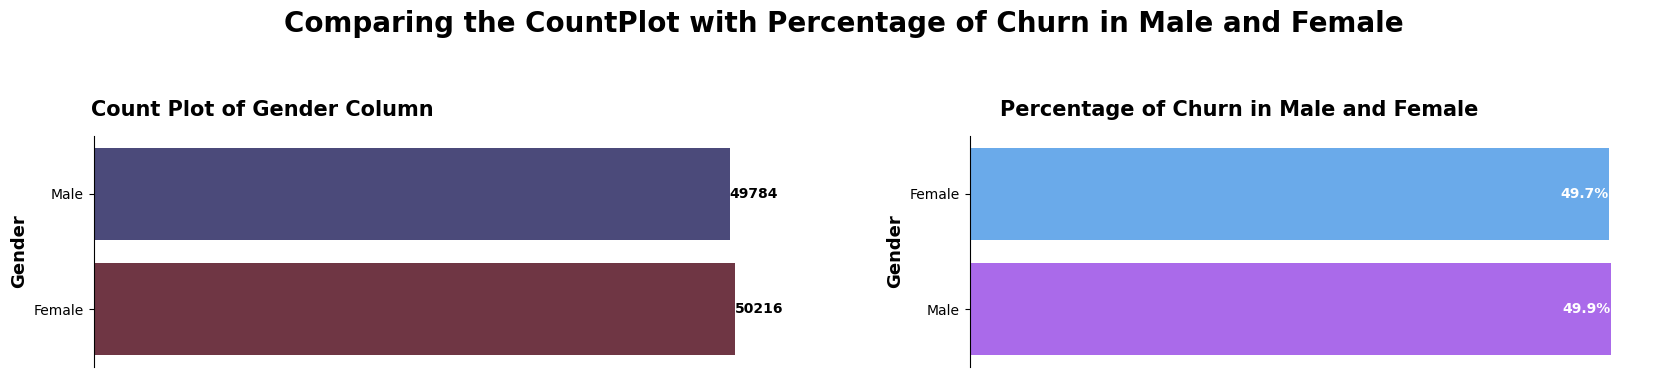

In [36]:
fig,axes=plt.subplots(1,2,figsize=(20,3))
sup_title="Comparing the CountPlot with Percentage of Churn in Male and Female"
plt.suptitle(f"{sup_title}",fontweight='bold',fontsize=20,y=1.3)
fig.subplots_adjust(wspace=0.3)

# Bar Plot
bar_Plot=sns.barplot(data=gender,y=gender.index,x=gender['Churn'],ax=axes[1],palette='cool')
bar_Plot.bar_label(bar_Plot.containers[0],fmt='%.1f%%',padding=-35,color='white',fontweight='bold')             # Setting bar labels with percentage of conversion
bar_Plot.set_title("Percentage of Churn in Male and Female",fontsize=15,fontweight='bold',x=0.4,y=1.05)         # Setting the title for subplot
bar_Plot.set_ylabel("Gender",fontweight='bold',fontsize=13)                                                     # Setting the ylabel
axes[1].spines[['right','top','bottom']].set_visible(False)                                                     # Removing the chart junk
axes[1].xaxis.set_visible(False)                                                                                # Hiding the x-axis

# Count Plot
cnt_Plot=sns.countplot(data=data,y='Gender',palette='icefire',ax=axes[0])
cnt_Plot.bar_label(cnt_Plot.containers[0],fontweight='bold')                                                    # Setting bar labels with count
cnt_Plot.set_title("Count Plot of Gender Column",fontsize=15,fontweight='bold',x=0.25,y=1.05)                   # Setting the title for subplot
cnt_Plot.set_ylabel("Gender",fontweight='bold',fontsize=13)                                                     # Setting the ylabel
axes[0].spines[['right','top','bottom']].set_visible(False)                                                     # Removing the chart junk
axes[0].xaxis.set_visible(False)                                                                                # Hiding the x-axis


([], [])

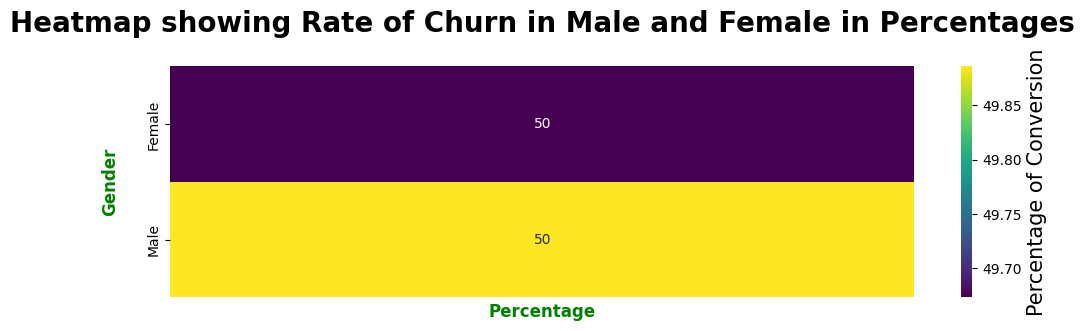

In [37]:
plt.figure(figsize=(12,3))
sns.heatmap(data=gender,annot=True,cmap='viridis',cbar_kws={'label':"Percentage of Conversion"}).figure.axes[-1].yaxis.label.set_size(15)
plt.title("Heatmap showing Rate of Churn in Male and Female in Percentages",fontsize=20,fontweight='bold',pad=25)
plt.xlabel("Percentage",fontsize=12,fontweight='bold',color='green')
plt.ylabel("Gender",fontsize=12,labelpad=20,fontweight='bold',color='green')
plt.xticks([])

From the above plots, it is evident that both male and female have same customer churn percentage.

**Multi-variation**

In [38]:
gender_N_location=data.pivot_table(index='Gender',columns='Location',values='Churn')
gender_N_location

Location,Chicago,Houston,Los Angeles,Miami,New York
Gender,,,,,
Female,0.497908,0.491948,0.488356,0.506046,0.499400
Male,0.498690,0.490256,0.497688,0.499950,0.508001


In [39]:
gender_N_location=gender_N_location.apply(lambda x:x*100)
gender_N_location


Location,Chicago,Houston,Los Angeles,Miami,New York
Gender,,,,,
Female,49.790753,49.194758,48.835596,50.604559,49.940012
Male,49.868978,49.025591,49.768844,49.994970,50.800122


(array([0.5, 1.5]), [Text(0, 0.5, 'Female'), Text(0, 1.5, 'Male')])

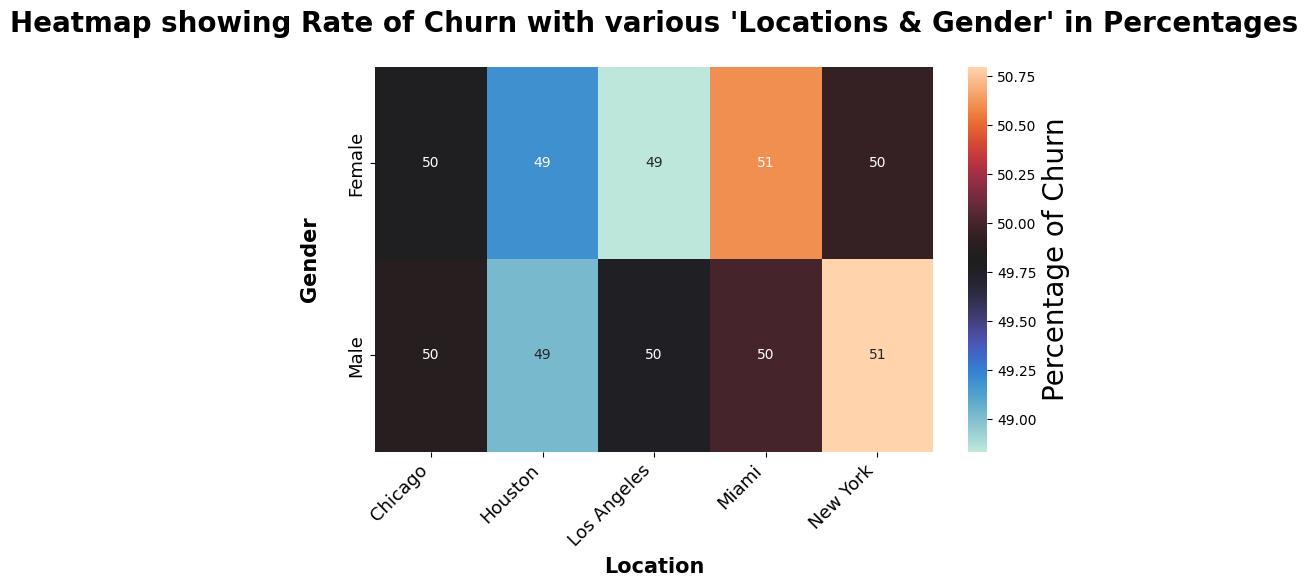

In [40]:
plt.figure(figsize=(9,5))

sns.heatmap(data=gender_N_location,annot=True,cmap='icefire',cbar_kws={'label':"Percentage of Churn"}).figure.axes[-1].yaxis.label.set_size(20)
plt.title("Heatmap showing Rate of Churn with various 'Locations & Gender' in Percentages",fontsize=20,fontweight='bold',pad=25)

plt.xlabel("Location",fontsize=15,fontweight='bold',labelpad=5)
plt.xticks(fontsize=13,rotation=45,ha='right')
plt.ylabel("Gender",fontsize=15,fontweight='bold',labelpad=20)
plt.yticks(fontsize=13)

In [41]:
data_group_location=data.groupby(['Location','Gender']).mean()
data_group_location

Age  Subscription_Length_Months  Monthly_Bill  \
Location    Gender                                                        
Chicago     Female  44.111798                   12.491431     64.885483   
            Male    44.314755                   12.549788     64.752471   
Houston     Female  44.156447                   12.449735     65.207742   
            Male    44.007972                   12.479429     65.049390   
Los Angeles Female  43.688435                   12.508275     64.963713   
            Male    44.064824                   12.437286     65.424280   
Miami       Female  44.233598                   12.579286     64.837054   
            Male    43.883714                   12.553164     65.067215   
New York    Female  43.882224                   12.409718     65.148906   
            Male    43.927428                   12.441749     65.201562   

                    Total_Usage_GB     Churn  
Location    Gender                            
Chicago     Female      274.950379  0.497908  
            Male        273.598166  0.498690  
Houston     Female      271.985596  0.491948  
            Male        275.662402  0.490256  
Los Angeles Female      275.544743  0.488356  
            Male        272.406633  0.497688  
Miami       Female      275.484341  0.506046  
            Male        273.979982  0.499950  
New York    Female      274.883823  0.499400  
            Male        275.397411  0.508001

In [42]:
data_group_location.drop(['Churn'],axis=1,inplace=True)

In [43]:
data_group_location

Age  Subscription_Length_Months  Monthly_Bill  \
Location    Gender                                                        
Chicago     Female  44.111798                   12.491431     64.885483   
            Male    44.314755                   12.549788     64.752471   
Houston     Female  44.156447                   12.449735     65.207742   
            Male    44.007972                   12.479429     65.049390   
Los Angeles Female  43.688435                   12.508275     64.963713   
            Male    44.064824                   12.437286     65.424280   
Miami       Female  44.233598                   12.579286     64.837054   
            Male    43.883714                   12.553164     65.067215   
New York    Female  43.882224                   12.409718     65.148906   
            Male    43.927428                   12.441749     65.201562   

                    Total_Usage_GB  
Location    Gender                  
Chicago     Female      274.950379  
            Male        273.598166  
Houston     Female      271.985596  
            Male        275.662402  
Los Angeles Female      275.544743  
            Male        272.406633  
Miami       Female      275.484341  
            Male        273.979982  
New York    Female      274.883823  
            Male        275.397411

In [44]:
data_group_location_reset = data_group_location.reset_index()

In [45]:
data_group_location_reset

,Location,Gender,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,Chicago,Female,44.111798,12.491431,64.885483,274.950379
1,Chicago,Male,44.314755,12.549788,64.752471,273.598166
2,Houston,Female,44.156447,12.449735,65.207742,271.985596
3,Houston,Male,44.007972,12.479429,65.049390,275.662402
4,Los Angeles,Female,43.688435,12.508275,64.963713,275.544743
5,Los Angeles,Male,44.064824,12.437286,65.424280,272.406633
6,Miami,Female,44.233598,12.579286,64.837054,275.484341
7,Miami,Male,43.883714,12.553164,65.067215,273.979982
8,New York,Female,43.882224,12.409718,65.148906,274.883823
9,New York,Male,43.927428,12.441749,65.201562,275.397411


In [46]:
data_group_location.index


MultiIndex([(    'Chicago', 'Female'),
            (    'Chicago',   'Male'),
            (    'Houston', 'Female'),
            (    'Houston',   'Male'),
            ('Los Angeles', 'Female'),
            ('Los Angeles',   'Male'),
            (      'Miami', 'Female'),
            (      'Miami',   'Male'),
            (   'New York', 'Female'),
            (   'New York',   'Male')],
           names=['Location', 'Gender'])

### **Methods**

In [47]:
def continuous_variables(column):
  column=str(column)
  fig,axes=plt.subplots(1,2,figsize=(25,7))

  sns.histplot(data=data,x=data[column],hue='Churn',palette='seismic_r',binwidth=2,kde=True,ax=axes[0]).set_title(f"Histogram of {column} Column",fontweight='bold',fontsize=20)
  sns.histplot(data=data,x=data[column],hue='Churn',palette='mako',binwidth=2,kde=True,ax=axes[1],multiple='fill',stat='probability').set_title(f"Histogram of Probability of Churn in {column}",fontweight='bold',fontsize=20 )


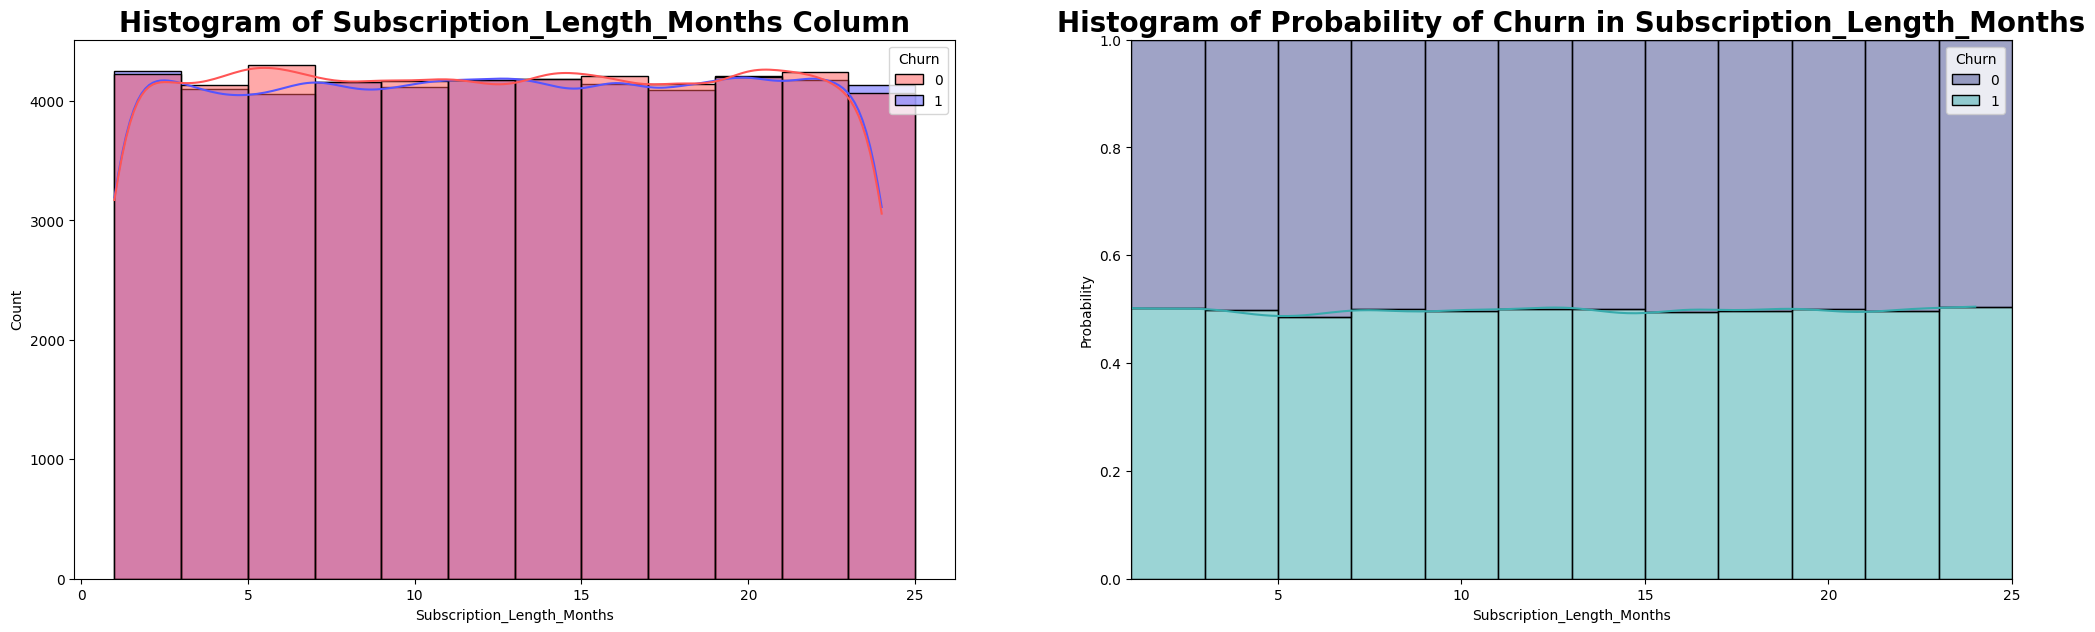

In [48]:
continuous_variables('Subscription_Length_Months')

In [57]:
def line(data,x,y):
  plt.figure(figsize=(10,5))
  plt.title("Average Subscription Length Vs Age",y=1.1,fontweight='bold')

  fig=sns.lineplot(data=data,y=y,x=data.index,color='#DE3163')
  fig.spines[['right','top']].set_visible(False)                                          # Removing the chart junk like boarders

### **Subscription_Length_Months**

In [ ]:
data['Age'].isnull().sum()
